This notebook generates the network diagram using networkX

In [77]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Import Network Diagram

In [46]:
directory = '../data/'

In [47]:
network_df = pd.read_csv(directory+'Network_tweets.csv')
network_df.columns = ['user1', 'user2', 'date', 'type']

In [48]:
network_df.head()

,user1,user2,date,type
0,givepeazachance,givepeazachance,2021-09-19 23:59:55+00:00,Tweet
1,JacobMcCourt,JacobMcCourt,2021-09-19 23:59:50+00:00,Tweet
2,ShaneWenzel,ShaneWenzel,2021-09-19 23:59:29+00:00,Tweet
3,AnthonyNCentre,JustinTrudeau,2021-09-19 23:59:26+00:00,Retweet
4,NunoMAguiar,erinotoole,2021-09-19 23:59:11+00:00,Retweet


### Graph Functions

In [49]:
# Colorful graph plot function

def nx_plot(G):
    pos = nx.spring_layout(G)

    node_sizes = [3 + 10 * i for i in range(len(G))]
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    cmap = plt.cm.plasma

    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
    edges = nx.draw_networkx_edges(
        G,
        pos,
        node_size=node_sizes,
        arrowstyle="->",
        arrowsize=10,
        edge_color=edge_colors,
        edge_cmap=cmap,
        width=2,
    )
    # set alpha value for each edge
    for i in range(M):
        edges[i].set_alpha(edge_alphas[i])

    pc = mpl.collections.PatchCollection(edges, cmap=cmap)
    pc.set_array(edge_colors)
    plt.colorbar(pc)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

In [50]:
# Generate degree distribution plots function

def degree_dist(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

### Generate Graph

In [51]:
def gen_graph(network_df):
    rt_in = network_df.type=='Retweet'
    rts = network_df[rt_in]
    tweets = network_df.drop(index= rts.index)
    graph = nx.DiGraph()
    graph.add_edges_from(zip(rts.user1, rts.user2), ttype = 'RT')
    graph.add_edges_from(zip(tweets.user1, tweets.user2), ttype = 'tweet')
    return graph

In [52]:
graph = gen_graph(network_df)

### Draw Simple Graph

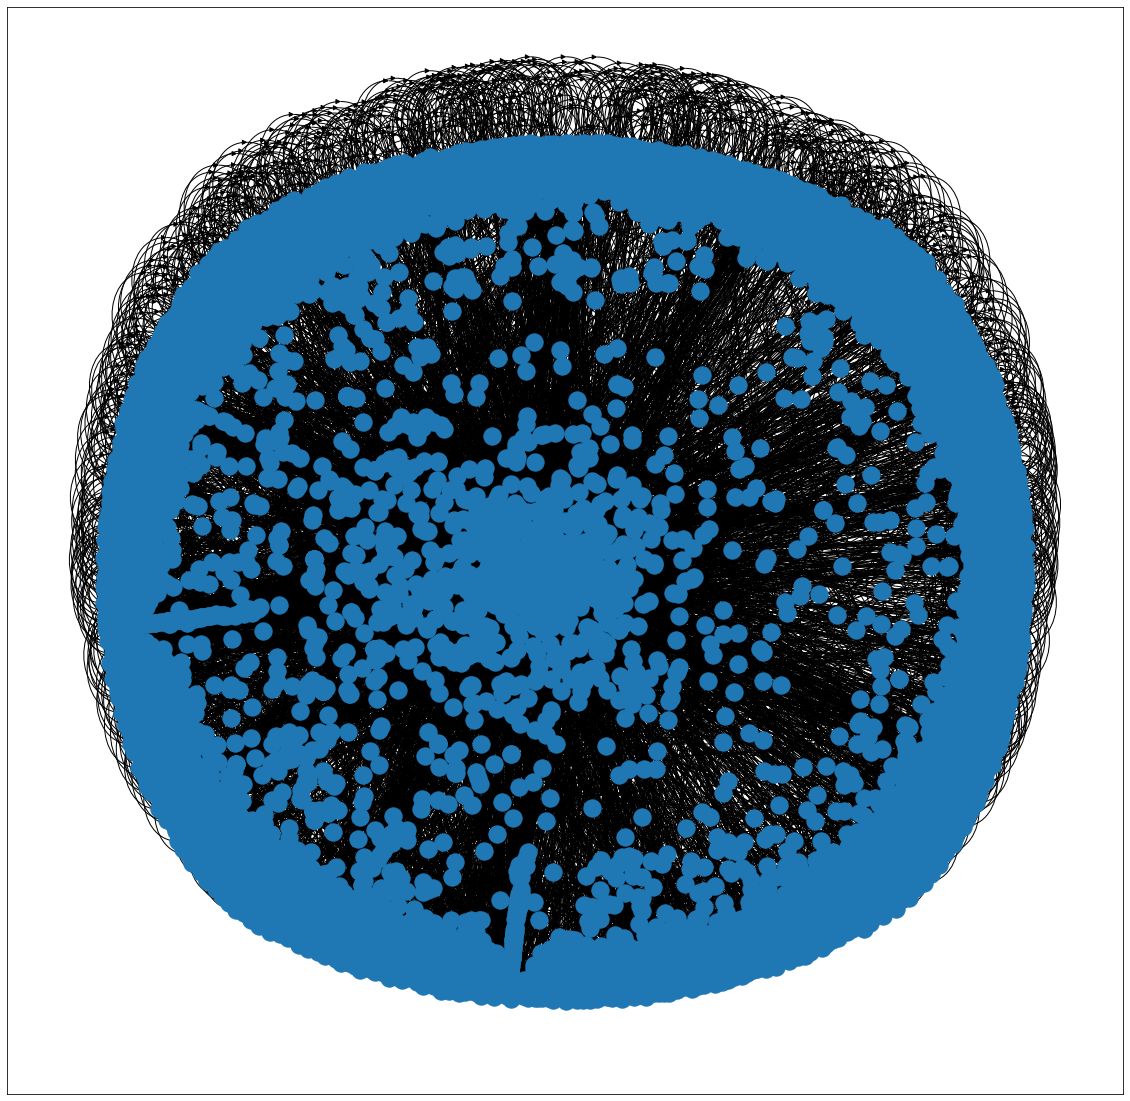

In [53]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
nx.draw_networkx(graph, font_size = 10, with_labels=False)
plt.show()

### Node Features

In [113]:
def network_feat(graph):
    df = {
        'in-degree_centrality': pd.Series(nx.algorithms.centrality.in_degree_centrality(graph)),
        'out-degree_centrality': pd.Series(nx.algorithms.centrality.out_degree_centrality(graph)),
        'betweeness_centrality': pd.Series(nx.algorithms.centrality.betweenness.betweenness_centrality(graph)),
        'eigenvector_centrality': pd.Series(nx.algorithms.centrality.eigenvector_centrality(graph)),
        'closeness': pd.Series(nx.algorithms.centrality.closeness.closeness_centrality(graph.reverse()))
    }
    
    return pd.concat(df, axis=1)

In [114]:
overall_feats = network_feat(graph)

In [115]:
overall_feats

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness
AnthonyNCentre,0.000000,0.000378,0.0,2.275849e-19,0.000378
JustinTrudeau,0.067233,0.000000,0.0,2.929957e-01,0.000000
NunoMAguiar,0.000000,0.000189,0.0,2.275849e-19,0.000189
erinotoole,0.073654,0.000000,0.0,9.076144e-02,0.000000
paolam1973,0.000189,0.001700,0.0,4.887348e-10,0.001511
...,...,...,...,...,...
ant_iuculano,0.000189,0.000189,0.0,4.887348e-10,0.000000
CH_Cartoon,0.000189,0.000189,0.0,4.887348e-10,0.000000
temurdur,0.000189,0.000189,0.0,4.887348e-10,0.000000
cdnpoli_memes,0.000189,0.000189,0.0,4.887348e-10,0.000000


<AxesSubplot:xlabel='closeness', ylabel='Density'>

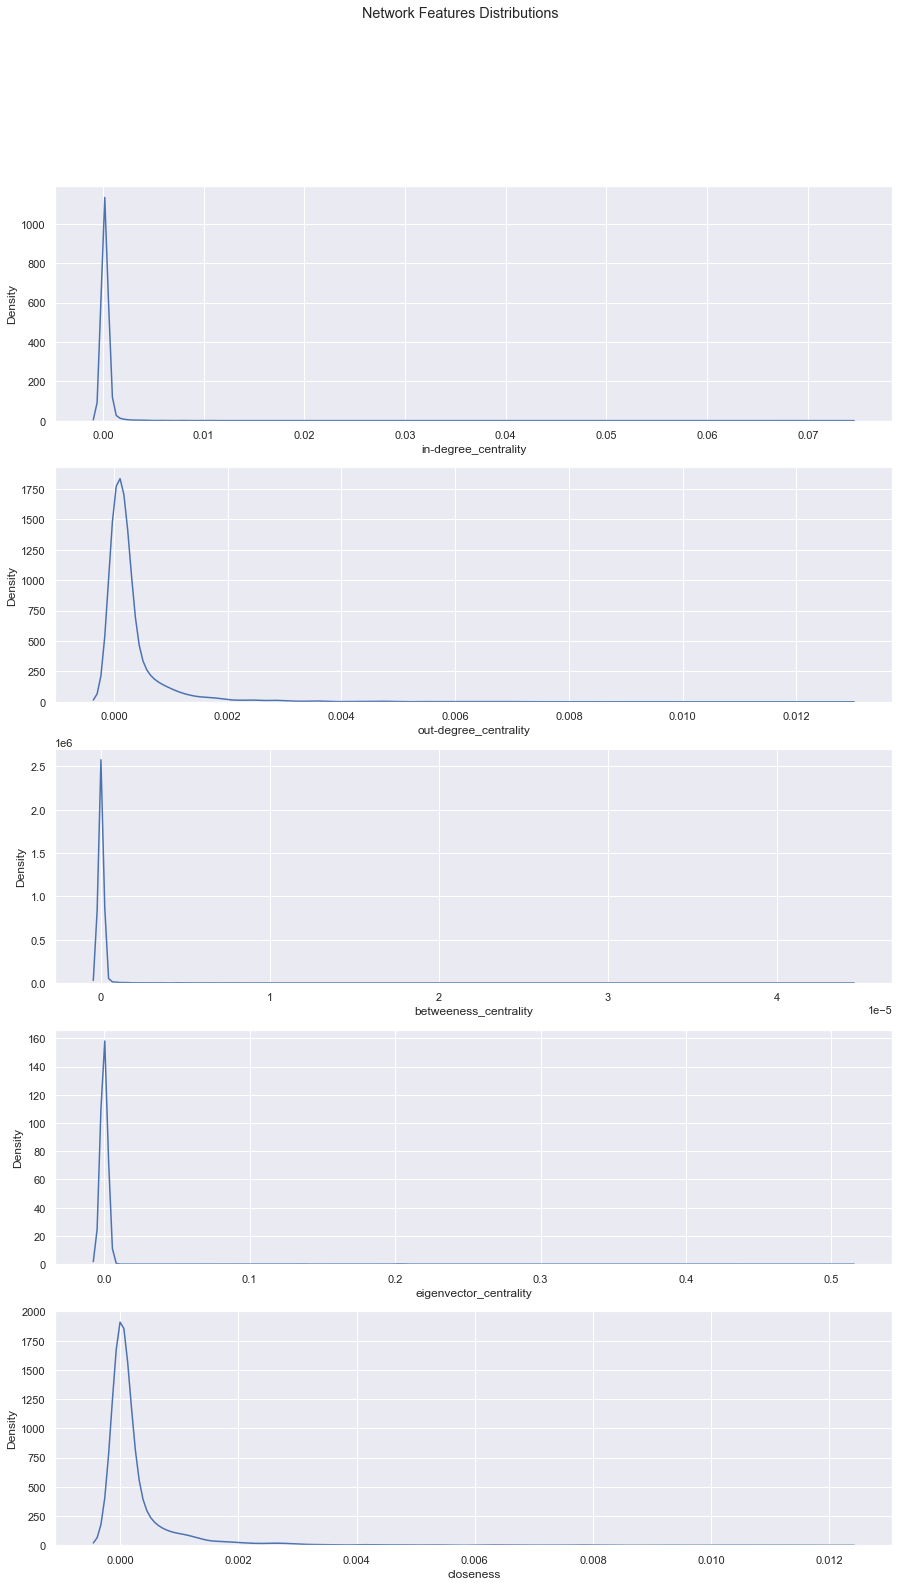

In [126]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(5, figsize=(15, 25))
 
fig.suptitle('Network Features Distributions')

sns.kdeplot(ax=axes[0], data=overall_feats, x='in-degree_centrality')
sns.kdeplot(ax=axes[1], data=overall_feats, x='out-degree_centrality')
sns.kdeplot(ax=axes[2], data=overall_feats, x='betweeness_centrality')
sns.kdeplot(ax=axes[3], data=overall_feats, x='eigenvector_centrality')
sns.kdeplot(ax=axes[4], data=overall_feats, x='closeness')

In [127]:
election_results = {
    'JustinTrudeau': 0.33,
    'erinotoole': 0.34,
    'yfblanchet': 0.08,
    'theJagmeetSingh': 0.18,
    'AnnamiePaul': 0.02,
    'MaximeBernier': 0.05
}

election_results = pd.Series(election_results, name='election_results')

In [135]:
results_df = pd.concat([overall_feats.loc[election_results.index], election_results], axis=1)
results_df

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness,election_results
JustinTrudeau,0.067233,0.000000,0.000000,2.929957e-01,0.000000,0.33
erinotoole,0.073654,0.000000,0.000000,9.076144e-02,0.000000,0.34
yfblanchet,0.000944,0.000000,0.000000,7.722009e-08,0.000000,0.08
theJagmeetSingh,0.033428,0.000000,0.000000,1.102548e-04,0.000000,0.18
AnnamiePaul,0.006421,0.000378,0.000003,1.253441e-05,0.000189,0.02
MaximeBernier,0.010576,0.000000,0.000000,1.022678e-07,0.000000,0.05


In [136]:
elect_corr = results_df.corr()['election_results']
elect_corr

in-degree_centrality      0.977842
out-degree_centrality    -0.509258
betweeness_centrality    -0.509258
eigenvector_centrality    0.764403
closeness                -0.509258
election_results          1.000000
Name: election_results, dtype: float64

<AxesSubplot:ylabel='value'>

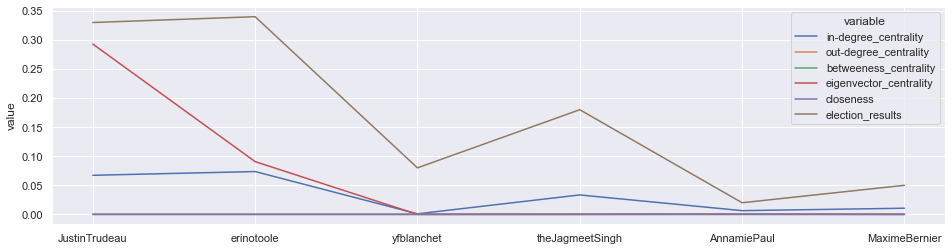

In [142]:
plot_data = results_df.melt(ignore_index = False)
sns.set(rc={"figure.figsize":(16, 4)})
sns.lineplot(x = plot_data.index, y = plot_data.value, hue = plot_data.variable)

In [146]:
overall_feats.nlargest(10, 'betweeness_centrality')

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness
kinsellawarren,0.012276,0.001700,0.000044,5.082120e-01,0.001680
TheTorontoSun,0.003022,0.001133,0.000022,3.376110e-01,0.001520
Papaschase2,0.000944,0.008876,0.000018,2.109387e-04,0.009347
Travisdhanraj,0.002455,0.003588,0.000012,2.932409e-09,0.003568
nspector4,0.001133,0.005855,0.000010,2.419237e-08,0.006295
MercedesGlobal,0.003777,0.001133,0.000008,1.056940e-04,0.001133
brianlilley,0.004344,0.000755,0.000008,2.242546e-01,0.001228
2muchfun4me,0.000944,0.001133,0.000008,2.446435e-05,0.001967
ellefranco5,0.000567,0.002455,0.000007,2.108597e-04,0.007726
MsAmyMacPherson,0.000567,0.001511,0.000007,8.552859e-09,0.007863


In [148]:
overall_feats.nlargest(10, 'out-degree_centrality')

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness
FriendsOScience,0.000189,0.012653,0.000000,4.887348e-10,0.011967
wengcouver,0.000189,0.010765,0.000002,4.887348e-10,0.010240
Mark3Ds,0.000000,0.009443,0.000000,2.275849e-19,0.010705
Papaschase2,0.000944,0.008876,0.000018,2.109387e-04,0.009347
Nastydwyer,0.000000,0.008121,0.000000,2.275849e-19,0.009737
GSawision,0.000189,0.007554,0.000000,4.887348e-10,0.007835
Joanbeam3000,0.000000,0.007177,0.000000,2.275849e-19,0.011792
OtagoGrad,0.000189,0.006988,0.000000,4.887348e-10,0.006589
mikebednarski,0.000189,0.006799,0.000000,4.887348e-10,0.007193
Me12Fish,0.000000,0.006799,0.000000,2.275849e-19,0.006818


In [149]:
overall_feats.nlargest(10, 'eigenvector_centrality')

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness
kinsellawarren,0.012276,0.001700,0.000044,0.508212,0.001680
KarlBelanger,0.000567,0.000189,0.000000,0.472364,0.000000
TheTorontoSun,0.003022,0.001133,0.000022,0.337611,0.001520
JustinTrudeau,0.067233,0.000000,0.000000,0.292996,0.000000
brianlilley,0.004344,0.000755,0.000008,0.224255,0.001228
TorontoStar,0.010387,0.000000,0.000000,0.202857,0.000000
CBC,0.001511,0.000000,0.000000,0.202857,0.000000
nytimes,0.001133,0.000000,0.000000,0.202857,0.000000
a_pinsent,0.000189,0.000378,0.000000,0.202857,0.001064
CFRAOttawa,0.000189,0.000000,0.000000,0.202857,0.000000


In [150]:
overall_feats.nlargest(10, 'closeness')

,in-degree_centrality,out-degree_centrality,betweeness_centrality,eigenvector_centrality,closeness
FriendsOScience,0.000189,0.012653,0.000000e+00,4.887348e-10,0.011967
Joanbeam3000,0.000000,0.007177,0.000000e+00,2.275849e-19,0.011792
Nortonvt,0.000189,0.006232,0.000000e+00,4.887348e-10,0.011308
Mark3Ds,0.000000,0.009443,0.000000e+00,2.275849e-19,0.010705
nehoez,0.000189,0.005855,0.000000e+00,4.887348e-10,0.010373
wengcouver,0.000189,0.010765,1.997736e-06,4.887348e-10,0.010240
Nastydwyer,0.000000,0.008121,0.000000e+00,2.275849e-19,0.009737
Papaschase2,0.000944,0.008876,1.847311e-05,2.109387e-04,0.009347
JA_Elliott,0.000378,0.004721,3.264158e-06,9.774696e-10,0.008829
VictorY_Wong,0.000189,0.002455,7.848249e-07,4.887348e-10,0.007994
